# Customer Segmentation

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Loading Dataset

In [2]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Pictures\\Data Visualization\\Datasets\\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Null values present or not
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


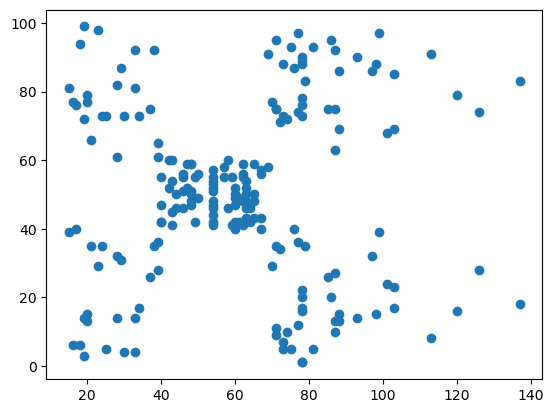

In [5]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [6]:
#Claculating sum squered error
sse=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)

C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

In [7]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30273.394312070042,
 24990.4343103969,
 21850.165282585636,
 19657.783608703958]

Text(0, 0.5, 'ssse')

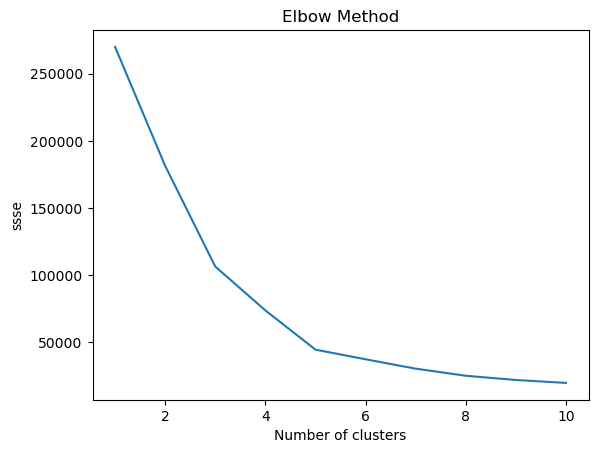

In [8]:
plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('ssse')

In [9]:
#Applying K-Means Algo
kmm=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmm.fit_predict(x)

C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [11]:
df['cluster']=y_kmeans

In [12]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

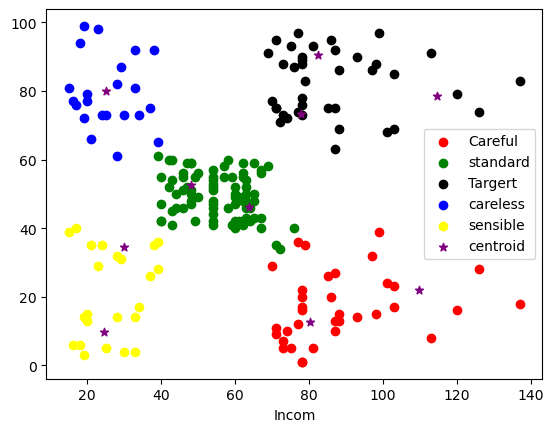

In [13]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='r',label='Careful')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='g',label='standard')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black',label='Targert')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='b',label='careless')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='yellow',label='sensible')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Incom')
plt.xlabel('Incom')
plt.legend()

# To Analyse Behavior of Customer

In [14]:
df['Target']=y_kmeans
df.drop('cluster',axis=1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
